<a href="https://colab.research.google.com/github/SanazGerami/miniproject3/blob/main/Sanaz_Gerami_9929873_miniproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1)**

غیرفازی ساز ماکزیمم - کران مرتبه اول

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
import warnings

x1 = Symbol('x1')
x2 = Symbol('x2')
g = 1/(3 + x1 + x2)
drv_x1 = diff(g, x1)
drv_x2 = diff(g, x2)

a = []
point1 = {x1: -1, x2: -1}
point2 = {x1: -1, x2: 1}
point3 = {x1: 1, x2: -1}
point4 = {x1: 1, x2: 1}
a1 = drv_x1.subs(point1)
if a1 < 0:
  a1 = -a1
a.append(a1)
a2 = drv_x1.subs(point2)
if a2 < 0:
  a2 = -a2
a.append(a2)
a3 = drv_x1.subs(point3)
if a3 < 0:
  a3 = -a3
a.append(a3)
a4 = drv_x1.subs(point4)
if a4 < 0:
  a4 = -a4
a.append(a4)

max_value = np.max(a)

print("drv_x1: ")
print(drv_x1)
print("\n")
print("drv_x2: ")
print(drv_x2)
print("\n")
print("Maximum: " + str(max_value))


drv_x1: 
-1/(x1 + x2 + 3)**2


drv_x2: 
-1/(x1 + x2 + 3)**2


Maximum: 1


In [ ]:
# h1*drv_x1 + h2*drv_x2 = eps -->  2*max_value*h = 0.1
h = h1 = h2 = 0.1/(2*max_value)
print("h = ", str(h) + "\n")

#range of inputs
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1,x2 = np.meshgrid(x1,x2)
n = len(x1)

N = (1 - (-1))/h;
if (N / 2 > 0):
  N = N + 1
N = int(N)
print("the number of fuzzy sets (N) = ", str(N) + "\n")

#define matrices
f_x = np.zeros((n, n))
e1 = np.ones((N, 1))
e2 = np.ones((N, 1))


h =  0.0500000000000000

the number of fuzzy sets (N) =  41



In [ ]:
for i in range(1, N):
  for j in range(1, N):
    e1[i - 1, 0] = -1 + h*(i - 1)
    e2[j - 1, 0] = -1 + h*(j - 1)

for k1 in range(0, n):
  for k2 in range(0, n):
    index = np.where(e1 <= x1[k1])[0]
    a = index[len(index) - 1]
    index = np.where(e1 >= x1[k1])[0]
    b = index[0]
    i1 = min(a, b)
    index = np.where(e2 <= x2[k2])[0]
    a = index[len(index) - 1]
    index = np.where(e2 >= x2[k2])[0]
    b = index[0]
    i2 = min(a, b)

    if np.any(x1[k1] >= e1[i1]):
      if np.any(x1[k1] <= .5*(e1[i1] + e1[i1 + 1])):
        if np.any(x2[k2] >= e2[i2]):
          if np.any(x2[k2] <= 0.5*(e2[i2] + e2[i2 + 1])):
            p = 0
            q = 0

    elif np.any(x1[k1] >= e1[i1]):
      if np.any(x1[k1] <= .5*(e1[i1] + e1[i1 + 1])):
        if np.any(x2[k2] >= 0.5*(e2[i2] + e2[i2 + 1])):
          if np.any(x2[k2] <= e2[i2 + 1]):
            p = 0
            q = 1

    elif np.any(x1[k1] >= 0.5*(e1[i1] + e1[i1 + 1])):
      if np.any(x1[k1] <= e1[i1 + 1]):
        if np.any(x2[k2] >= e2[i2]):
          if np.any(x2[k2] <= 0.5*(e2[i2] + e2[i2 + 1])):
            p = 1
            q = 0

    elif np.any(x1[k1] >= .5*(e1[i1] + e1[i1 + 1])):
      if np.any(x1[k1] <= e1[i1 + 1]):
        if np.any(x2[k2] >= 0.5*(e2[i2] + e2[i2 + 1])):
          if np.any(x2[k2] <= e2[i2 + 1]):
            p = 1
            q = 1

    f_x[k1, k2] = 1/(3 + e1[i1 + p] + e2[i2 + q])

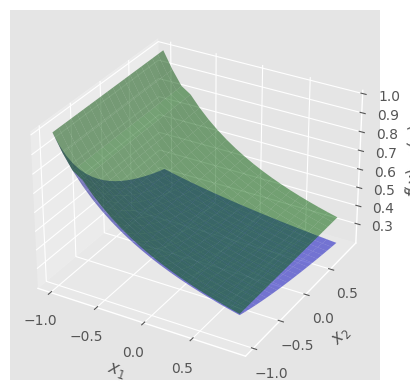

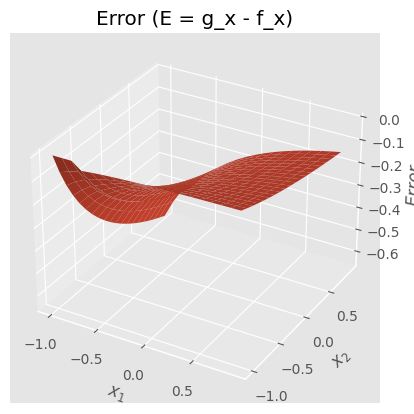

In [ ]:
g_x = 1 / (3 + x1 + x2)

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='g')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy10.svg')
plt.show()


fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
plt.title("Error (E = g_x - f_x)")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy12.svg')
plt.show()

غیرفازی ساز میانگین - کران مرتبه اول

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
import warnings

x1 = Symbol('x1')
x2 = Symbol('x2')
g = 1/(3 + x1 + x2)
drv_x1 = diff(g, x1)
drv_x2 = diff(g, x2)

a = []
point1 = {x1: -1, x2: -1}
point2 = {x1: -1, x2: 1}
point3 = {x1: 1, x2: -1}
point4 = {x1: 1, x2: 1}
a1 = drv_x1.subs(point1)
if a1 < 0:
  a1 = -a1
a.append(a1)
a2 = drv_x1.subs(point2)
if a2 < 0:
  a2 = -a2
a.append(a2)
a3 = drv_x1.subs(point3)
if a3 < 0:
  a3 = -a3
a.append(a3)
a4 = drv_x1.subs(point4)
if a4 < 0:
  a4 = -a4
a.append(a4)

max_value = np.max(a)

h = h1 = h2 = 0.1/(2*max_value)

N = (1 - (-1))/h;
if (N / 2 > 0):
  N = N + 1
N = int(N)

x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1,x2 = np.meshgrid(x1,x2)

num = 0
den = 0
k = 0

g_p = np.zeros((N*N, 1))
e1 = np.zeros((N, 1))
e2 = np.zeros((N, 1))

In [ ]:
#triangle membership function
def trimf(x, abc):
  if abc[1] - abc[0] == 0 or abc[2] - abc[1] == 0:
    return np.full_like(x, 0)
  return np.fmax(np.fmin((x - abc[0]) / (abc[1] - abc[0]), (abc[2] - x) / (abc[2] - abc[1])), 0)

In [ ]:
for i in range(1, N):
  for j in range(1, N):
    e1[i - 1, 0] = -1 + h*(i - 1)
    e2[j - 1, 0] = -1 + h*(j - 1)

    if i == 1:
      mu1 = trimf(x1, [-1, -1, -1 + h])
    elif i == N:
      mu1 = trimf(x1, [1 - h, 1, 1])
    else:
      mu1 = trimf(x1, [-1 + h*(i - 2), -1 + h*(i - 1), -1 + h*(i)])

    if j == 1:
      mu2 = trimf(x2, [-1, -1, -1 + h])
    elif i == N:
      mu2 = trimf(x2, [1 - h, 1, 1])
    else:
      mu2 = trimf(x1, [-1 + h*(j - 2), -1 + h*(j - 1), -1 + h*(j)])

    g_p[k,0] = 1 / (3 + e1[i - 1,0] + e2[j - 1,0])
    num = num + g_p[k,0]*mu1*mu2
    den = den + mu1*mu2
    k = k + 1

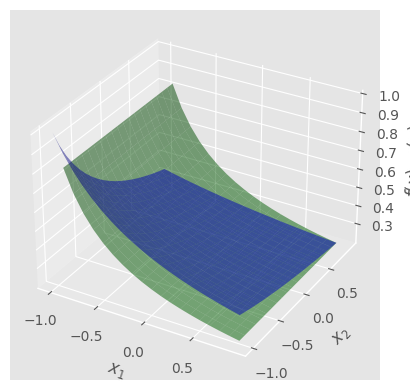

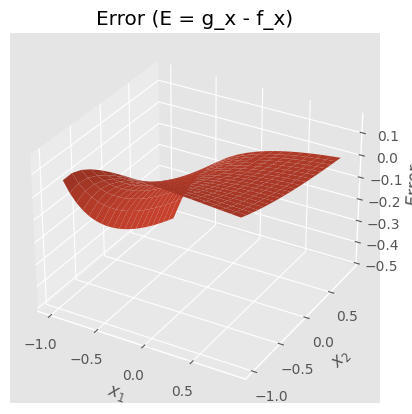

In [ ]:
f_x = num/den
g_x = 1 / (3 + x1 + x2)

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='g')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy10.svg')
plt.show()

fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
plt.title("Error (E = g_x - f_x)")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy12.svg')
plt.show()

غیرفازی‌ساز ماکزیمم - کران مرتبه دوم

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
import warnings

x1 = Symbol('x1')
x2 = Symbol('x2')
g = 1/(3 + x1 + x2)
drv_x1 = diff(g, x1)
drv_x2 = diff(g, x2)
drv_x1 = diff(drv_x1, x1)
drv_x2 = diff(drv_x2, x2)

a = []
point1 = {x1: -1, x2: -1}
point2 = {x1: -1, x2: 1}
point3 = {x1: 1, x2: -1}
point4 = {x1: 1, x2: 1}
a1 = drv_x1.subs(point1)
if a1 < 0:
  a1 = -a1
a.append(a1)
a2 = drv_x1.subs(point2)
if a2 < 0:
  a2 = -a2
a.append(a2)
a3 = drv_x1.subs(point3)
if a3 < 0:
  a3 = -a3
a.append(a3)
a4 = drv_x1.subs(point4)
if a4 < 0:
  a4 = -a4
a.append(a4)

max_value = np.max(a)

print("drv_x1: ")
print(drv_x1)
print("\n")
print("drv_x2: ")
print(drv_x2)
print("\n")
print("Maximum: " + str(max_value))


drv_x1: 
2/(x1 + x2 + 3)**3


drv_x2: 
2/(x1 + x2 + 3)**3


Maximum: 2


In [ ]:
# h1*drv_x1 + h2*drv_x2 = eps -->  2*max_value*h = 0.1
h = h1 = h2 = 0.1/(2*max_value)
print("h = ", str(h) + "\n")

#range of inputs
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1,x2 = np.meshgrid(x1,x2)
n = len(x1)

N = (1 - (-1))/h;
if (N / 2 > 0):
  N = N + 1
N = int(N)
print("the number of fuzzy sets (N) = ", str(N) + "\n")

#define matrices
f_x = np.zeros((n, n))
e1 = np.ones((N, 1))
e2 = np.ones((N, 1))


h =  0.0250000000000000

the number of fuzzy sets (N) =  81



In [ ]:
for i in range(1, N):
  for j in range(1, N):
    e1[i - 1, 0] = -1 + h*(i - 1)
    e2[j - 1, 0] = -1 + h*(j - 1)

for k1 in range(0, n):
  for k2 in range(0, n):
    index = np.where(e1 <= x1[k1])[0]
    a = index[len(index) - 1]
    index = np.where(e1 >= x1[k1])[0]
    b = index[0]
    i1 = min(a, b)
    index = np.where(e2 <= x2[k2])[0]
    a = index[len(index) - 1]
    index = np.where(e2 >= x2[k2])[0]
    b = index[0]
    i2 = min(a, b)

    if np.any(x1[k1] >= e1[i1]):
      if np.any(x1[k1] <= .5*(e1[i1] + e1[i1 + 1])):
        if np.any(x2[k2] >= e2[i2]):
          if np.any(x2[k2] <= 0.5*(e2[i2] + e2[i2 + 1])):
            p = 0
            q = 0

    elif np.any(x1[k1] >= e1[i1]):
      if np.any(x1[k1] <= .5*(e1[i1] + e1[i1 + 1])):
        if np.any(x2[k2] >= 0.5*(e2[i2] + e2[i2 + 1])):
          if np.any(x2[k2] <= e2[i2 + 1]):
            p = 0
            q = 1

    elif np.any(x1[k1] >= 0.5*(e1[i1] + e1[i1 + 1])):
      if np.any(x1[k1] <= e1[i1 + 1]):
        if np.any(x2[k2] >= e2[i2]):
          if np.any(x2[k2] <= 0.5*(e2[i2] + e2[i2 + 1])):
            p = 1
            q = 0

    elif np.any(x1[k1] >= .5*(e1[i1] + e1[i1 + 1])):
      if np.any(x1[k1] <= e1[i1 + 1]):
        if np.any(x2[k2] >= 0.5*(e2[i2] + e2[i2 + 1])):
          if np.any(x2[k2] <= e2[i2 + 1]):
            p = 1
            q = 1

    f_x[k1, k2] = 1/(3 + e1[i1 + p] + e2[i2 + q])

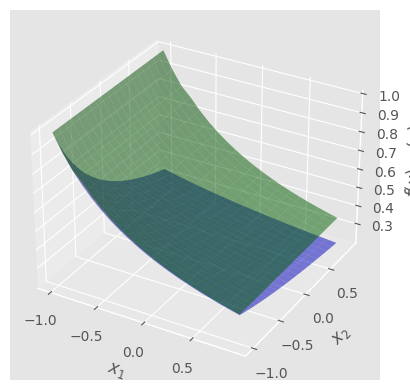

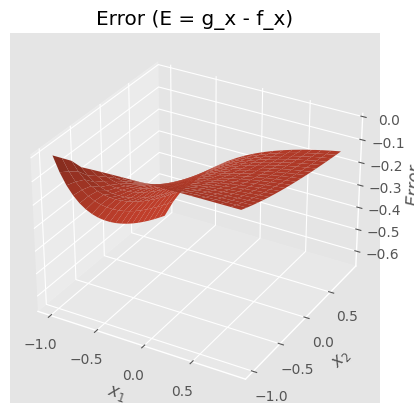

In [ ]:
g_x = 1 / (3 + x1 + x2)

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='g')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy10.svg')
plt.show()


fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
plt.title("Error (E = g_x - f_x)")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy12.svg')
plt.show()

غیرفازی‌ساز میانگین - کران مرتبه دوم

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
import warnings

x1 = Symbol('x1')
x2 = Symbol('x2')
g = 1/(3 + x1 + x2)
drv_x1 = diff(g, x1)
drv_x2 = diff(g, x2)
drv_x1 = diff(drv_x1, x1)
drv_x2 = diff(drv_x2, x2)

a = []
point1 = {x1: -1, x2: -1}
point2 = {x1: -1, x2: 1}
point3 = {x1: 1, x2: -1}
point4 = {x1: 1, x2: 1}
a1 = drv_x1.subs(point1)
if a1 < 0:
  a1 = -a1
a.append(a1)
a2 = drv_x1.subs(point2)
if a2 < 0:
  a2 = -a2
a.append(a2)
a3 = drv_x1.subs(point3)
if a3 < 0:
  a3 = -a3
a.append(a3)
a4 = drv_x1.subs(point4)
if a4 < 0:
  a4 = -a4
a.append(a4)

max_value = np.max(a)

h = h1 = h2 = 0.1/(2*max_value)

N = (1 - (-1))/h;
if (N / 2 > 0):
  N = N + 1
N = int(N)

x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1,x2 = np.meshgrid(x1,x2)

num = 0
den = 0
k = 0

g_p = np.zeros((N*N, 1))
e1 = np.zeros((N, 1))
e2 = np.zeros((N, 1))


In [ ]:
#triangle membership function
def trimf(x, abc):
  if abc[1] - abc[0] == 0 or abc[2] - abc[1] == 0:
    return np.full_like(x, 0)
  return np.fmax(np.fmin((x - abc[0]) / (abc[1] - abc[0]), (abc[2] - x) / (abc[2] - abc[1])), 0)

In [ ]:
for i in range(1, N):
  for j in range(1, N):
    e1[i - 1, 0] = -1 + h*(i - 1)
    e2[j - 1, 0] = -1 + h*(j - 1)

    if i == 1:
      mu1 = trimf(x1, [-1, -1, -1 + h])
    elif i == N:
      mu1 = trimf(x1, [1 - h, 1, 1])
    else:
      mu1 = trimf(x1, [-1 + h*(i - 2), -1 + h*(i - 1), -1 + h*(i)])

    if j == 1:
      mu2 = trimf(x2, [-1, -1, -1 + h])
    elif i == N:
      mu2 = trimf(x2, [1 - h, 1, 1])
    else:
      mu2 = trimf(x1, [-1 + h*(j - 2), -1 + h*(j - 1), -1 + h*(j)])

    g_p[k,0] = 1 / (3 + e1[i - 1,0] + e2[j - 1,0])
    num = num + g_p[k,0]*mu1*mu2
    den = den + mu1*mu2
    k = k + 1

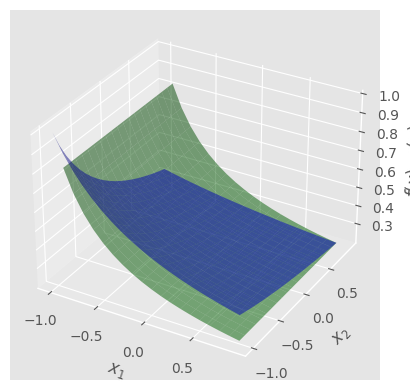

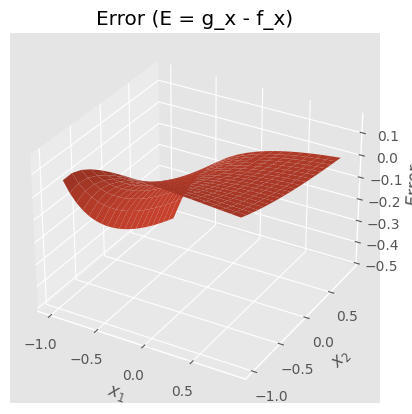

In [ ]:
f_x = num/den
g_x = 1 / (3 + x1 + x2)

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='g')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy10.svg')
plt.show()

fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
plt.title("Error (E = g_x - f_x)")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy12.svg')
plt.show()

**Q3)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import math

M = 5
alpha = 0.1
epock = 200
total_num = 500

x_bar = np.zeros((epock, M))
g_bar = np.zeros((epock, M))
sigma = np.zeros((epock, M))

y = np.zeros((total_num, 1))
x = np.zeros((total_num, 1))
y_hat = np.zeros((total_num, 1))
f_hat = np.zeros((total_num, 1))
z = np.zeros((total_num, 1))
g_u = np.zeros((total_num, 1))

In [ ]:
x[0] = -1 + (2*np.random.randn(1, 1))
y[0] = 0

g_u[0] = 0.6*np.sin(pi*x[0]) + 0.3*np.sin(3*pi*x[0]) + 0.1*np.sin(5*pi*x[0])
f_hat[0] = g_u[0]

u_min = -1
u_max = 1
h = (u_max - u_min)/(M - 1)

for k in range(0, M):
  x_bar[0, k] = -1 + h*(k - 1)
  g_bar[0, k] = 0.6*np.sin(pi*x_bar[0, k]) + 0.3*np.sin(3*pi*x_bar[0, k]) + 0.1*np.sin(5*pi*x_bar[0, k])

maxi = -1000
mini = 1000
for k in range(0, M):
  if x_bar[0, k] > maxi:
    maxi = x_bar[0, k]
  if x_bar[0, k] < mini:
    mini = x_bar[0, k]

for k in range(0, M):
  sigma[0, k] = (maxi - mini)/(M)

x_bar[1, :] = x_bar[0, :]
g_bar[1, :] = g_bar[0, :]
sigma[1, :] = sigma[0, :]

x_bar_initial = x_bar[0, :]
g_bar_initial = g_bar[0, :]
sigma_initial = sigma[0, :]

In [ ]:
for q in range(1, epock - 1):
  a = 0
  b = 0
  x[q] = -1 + (2*np.random.randn(1, 1))
  g_u[q] = 0.6*np.sin(pi*x[q]) + 0.3*np.sin(3*pi*x[q]) + 0.1*np.sin(5*pi*x[q])

  for l in range(0, M):
    z[l] = math.exp(-((x[q] - x_bar[q, l])) / (sigma[q, l]*sigma[q, l]))
    b = b + z[l]
    a = a + g_bar[q, l]*z[l]

  f_hat[q] = a / b
  y[q + 1] = 0.3*y[q] + 0.6*y[q - 1] + g_u[q]
  y_hat[q + 1] = 0.3*y[q] + 0.6*y[q - 1] + f_hat[q]

  for l in range(0, M):
    g_bar[q + 1, l] = g_bar[q, l] - alpha*(f_hat[q] - g_u[q])*z[l]/b
    x_bar[q + 1, l] = x_bar[q, l] - alpha*( (f_hat[q] - g_u[q])/b )*(g_bar[q, l] - f_hat[q])*z[l]*2*(x[q] - x_bar[q, l])/(sigma[q, l]*sigma[q, l])
    sigma[q + 1, l] = sigma[q, l] - alpha*( (f_hat[q] - g_u[q])/b )*(g_bar[q, l] - f_hat[q])*z[l]*2*( (x[q] - x_bar[q, l])*(x[q] - x_bar[q, l]) )/(sigma[q, l]*sigma[q, l]*sigma[q, l])

In [ ]:
x_bar_final = x_bar[199, :]
g_bar_final = g_bar[199, :]
sigma_final = sigma[199, :]

for q in range(epock, total_num - 1):
  a = 0
  b = 0
  x[q] = np.sin(2*q*pi/200)
  g_u[q] = 0.6*np.sin(pi*x[q]) + 0.3*np.sin(3*pi*x[q]) + 0.1*np.sin(5*pi*x[q])

  for l in range(0, M):
    z[l] = math.exp(-((x[199] - x_bar[199, l])) / (sigma[199, l]*sigma[199, l]))
    b = b + z[l]
    a = a + g_bar[199, l]*z[l]

  f_hat[q] = a / b
  y[q + 1] = 0.3*y[q] + 0.6*y[q - 1] + g_u[q]
  y_hat[q + 1] = 0.3*y[q] + 0.6*y[q - 1] + f_hat[q]

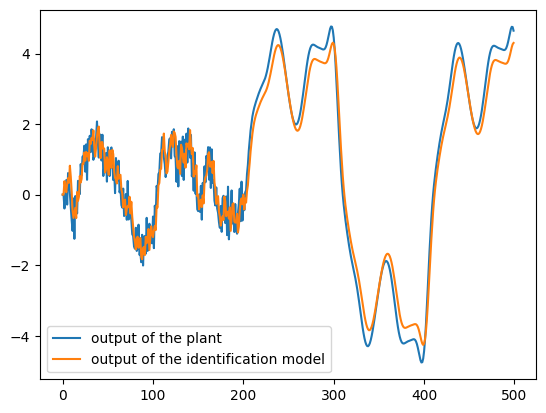

In [ ]:
plt.plot(y, label = 'output of the plant')
plt.plot(y_hat, label = 'output of the identification model')
plt.legend()

**Q4)**

4.1

In [ ]:
!pip install --upgrade --no-cache-dir gdown;
!gdown 15osnAhVMEGScxCx6l9KRCDJYhGPTn1uP;

df = pd.read_csv("covid.csv")
print(df)

Downloading...
From: https://drive.google.com/uc?id=15osnAhVMEGScxCx6l9KRCDJYhGPTn1uP
To: /content/covid.csv
100% 258/258 [00:00<00:00, 1.09MB/s]
   Fever Cough Breathing issues Infected
0     No    No               No       No
1    Yes   Yes              Yes      Yes
2    Yes   Yes               No       No
3    Yes    No              Yes      Yes
4    Yes   Yes              Yes      Yes
5     No   Yes               No       No
6    Yes    No              Yes      Yes
7    Yes    No              Yes      Yes
8     No   Yes              Yes      Yes
9    Yes   Yes               No      Yes
10    No   Yes               No       No
11    No   Yes              Yes      Yes
12    No   Yes              Yes       No
13   Yes   Yes               No       No


Entropy

In [ ]:
def entropy(labels):
  p = labels.value_counts() / len(labels)
  return -sum(p * np.log2(p))

Information Gain

In [ ]:
def information_gain(data, feature, target):
    entropy_parent = entropy(data[target])

    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

class Node

In [ ]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

make tree

In [ ]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)

    return node

In [ ]:
tree = make_tree(df, 'Infected')

Visualization

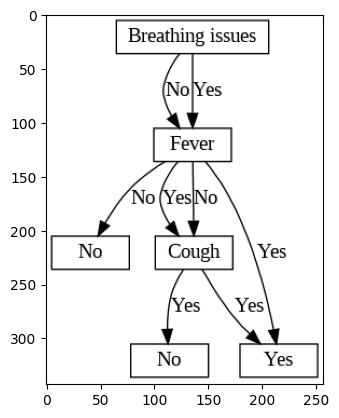

In [ ]:
from graphviz import Digraph, nohtml
from matplotlib import image as img

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

image = img.imread('decision_tree.png')
plt.imshow(image)

4.2

The accuracy of Decision Tree is:  0.9385964912280702


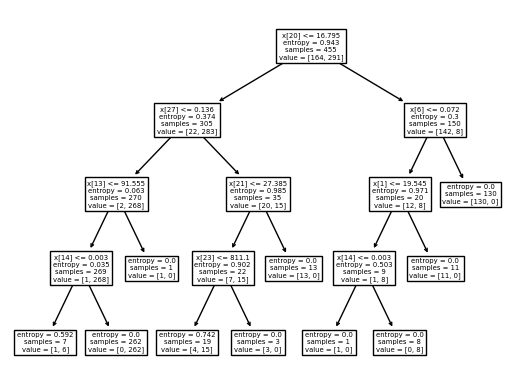

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size = 0.2)

clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42, criterion = 'entropy')
clf.fit(X_train, y_train)
tree.plot_tree(clf)

clf.predict(X_test)
a = clf.score(X_test, y_test)

print("The accuracy of Decision Tree is: ", str(a))

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node with value=[[164. 291.]]: go to node 1 if X[:, 20] <= 16.795000076293945 else to node 4.
	node=1 is a split node with value=[[ 22. 283.]]: go to node 2 if X[:, 27] <= 0.1359499990940094 else to node 3.
		node=2 is a leaf node with value=[[  2. 268.]].
		node=3 is a leaf node with value=[[20. 15.]].
	node=4 is a split node with value=[[142.   8.]]: go to node 5 if X[:, 6] <= 0.07214000076055527 else to node 6.
		node=5 is a leaf node with value=[[12.  8.]].
		node=6 is a leaf node with value=[[130.   0.]].


In [ ]:
i = 1
X_test[i]
decision_path = clf.decision_path(X_test[[i]])
decision_path.toarray()

array([[1, 1, 1, 0, 0, 0, 0]])

In [ ]:
i = 24
X_test[i]
decision_path = clf.decision_path(X_test[[i]])
decision_path.toarray()

array([[1, 0, 0, 0, 1, 0, 1]])

The accuracy of Decision Tree is:  0.8771929824561403


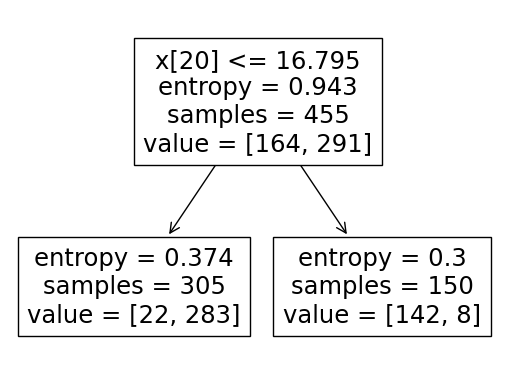

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42, criterion = 'entropy', ccp_alpha = 0.2)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

clf.predict(X_test)
a = clf.score(X_test, y_test)

print("The accuracy of Decision Tree is: ", str(a))

The accuracy of Decision Tree is:  0.9122807017543859


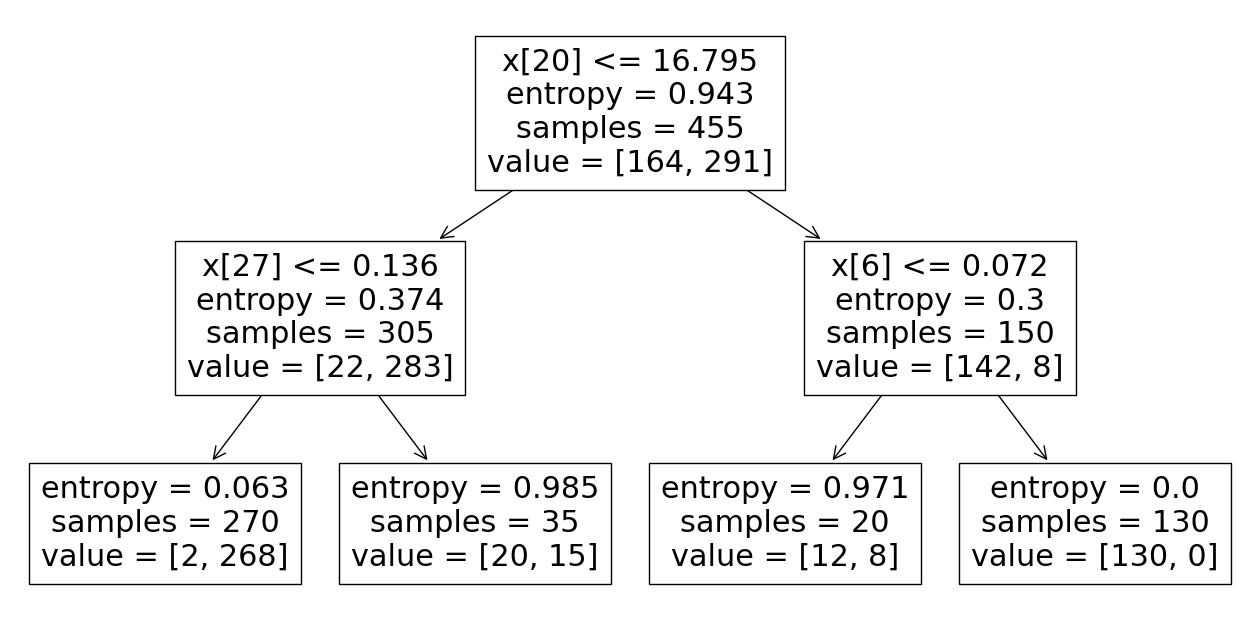

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = 'entropy', ccp_alpha = 0.05)
clf.fit(X_train, y_train)
plt.figure(figsize = (16, 8))
tree.plot_tree(clf)

clf.predict(X_test)
a = clf.score(X_test, y_test)

print("The accuracy of Decision Tree is: ", str(a))